In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
df = pd.read_csv('/work/diabetes.csv')
X = df.drop('Outcome', axis=1).copy()
y = df['Outcome'].copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
DeepnoteChart(df, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"bin":true,"sort":null,"type":"quantitative","field":"Outcome","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"aggregate":"count"}}}""")

<AxesSubplot: >

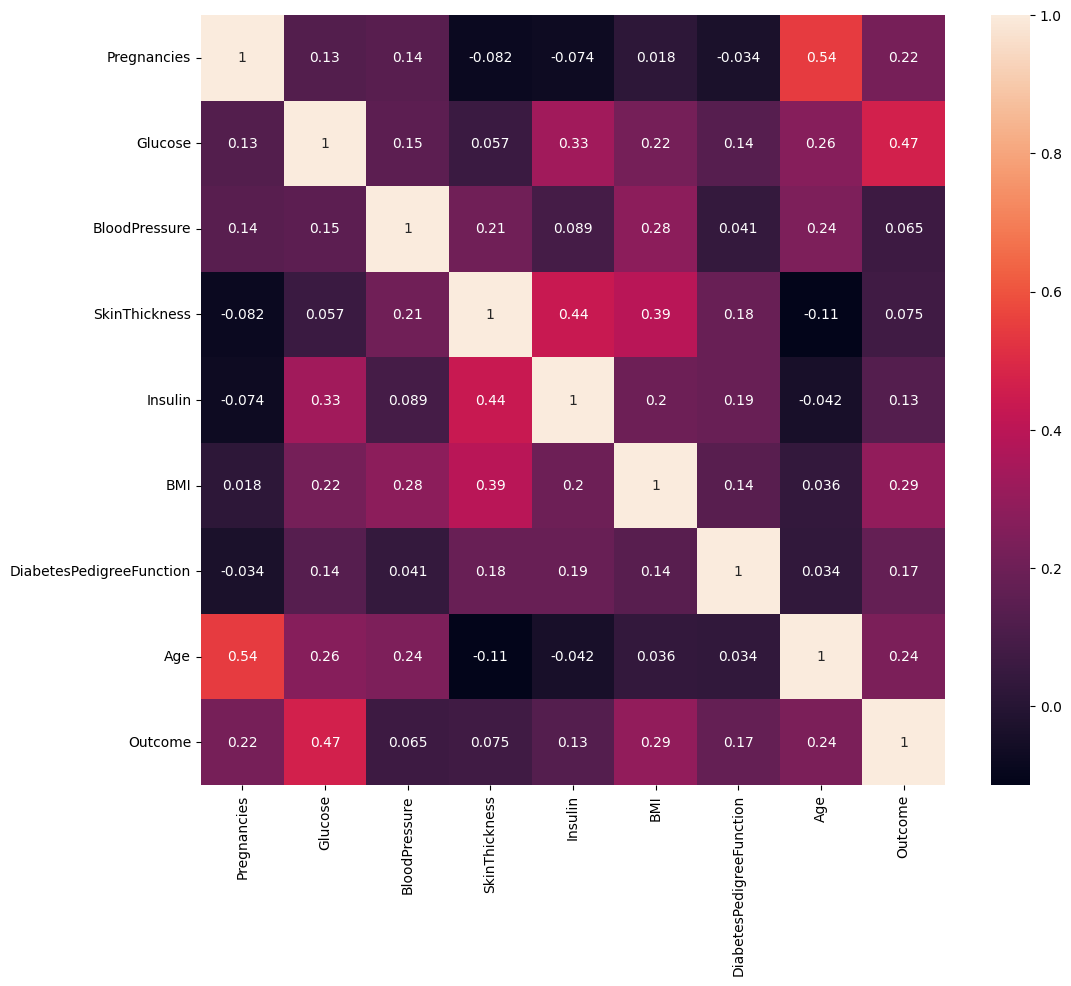

In [24]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(df_corr, annot=True, ax=ax)

In [20]:
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
train, test = train_test_split(df, stratify=df['Outcome'], test_size=0.2, random_state = 646)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
743,9,140,94,0,0,32.7,0.734,45,1
395,2,127,58,24,275,27.7,1.600,25,0
94,2,142,82,18,64,24.7,0.761,21,0
591,2,112,78,50,140,39.4,0.175,24,0
130,4,173,70,14,168,29.7,0.361,33,1
...,...,...,...,...,...,...,...,...,...
720,4,83,86,19,0,29.3,0.317,34,0
234,3,74,68,28,45,29.7,0.293,23,0
434,1,90,68,8,0,24.5,1.138,36,0
451,2,134,70,0,0,28.9,0.542,23,1


In [18]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
307,0,137,68,14,148,24.8,0.143,21,0
240,1,91,64,24,0,29.2,0.192,21,0
693,7,129,68,49,125,38.5,0.439,43,1
389,3,100,68,23,81,31.6,0.949,28,0
331,2,87,58,16,52,32.7,0.166,25,0
...,...,...,...,...,...,...,...,...,...
380,1,107,72,30,82,30.8,0.821,24,0
88,15,136,70,32,110,37.1,0.153,43,1
47,2,71,70,27,0,28.0,0.586,22,0
554,1,84,64,23,115,36.9,0.471,28,0


In [19]:
X_train = train.drop('Outcome', axis=1).copy(); y_train = train['Outcome']
X_test = test.drop('Outcome', axis=1).copy(); y_test = test['Outcome']

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def DT_train_score(x_train, x_test, y_train, y_test):
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return model, accuracy

def RF_train_score(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=200, max_depth=10)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return model, accuracy

def feature_importance(model):
    feature_score = model.feature_importances_
    return feature_score

In [26]:
RF1, accurayRF_1 = RF_train_score(X_train, X_test, y_train, y_test)
RF1_feature_score = pd.Series(feature_importance(RF1))
RF1_score_sorted = RF1_feature_score.argsort()[::-1]
print('RF Accuracy \tall  \t{:.2f}'.format(accurayRF_1),end='\n')
print(RF1_score_sorted)

DT1, accurayDT_1 = DT_train_score(X_train, X_test, y_train, y_test)
DT1_feature_score = pd.Series(feature_importance(DT1))
DT1_score_sorted = DT1_feature_score.argsort()[::-1]
print('DT Accuracy \tall  \t{:.2f}'.format(accurayDT_1),end='\n')
print(DT1_score_sorted)

RF Accuracy 	all  	0.82
7    1
6    5
5    6
4    7
3    2
2    0
1    4
0    3
dtype: int64
DT Accuracy 	all  	0.72
7    1
6    5
5    6
4    0
3    7
2    2
1    4
0    3
dtype: int64


In [33]:
%%time
x_RF = {}
current_RF = []
x_plotRF = np.array([])
y_plotRF = np.array([])
sum_scoreRF = 0

x_name = np.array([])
#RF model
for i,idx in enumerate(RF1_score_sorted):
    current_RF += [idx]
    x_RF[i] = X.iloc[:, current_RF].astype(str)
    xD1_train, xD1_test, yD1_train, yD1_test = train_test_split(x_RF[i], y, test_size=0.3, random_state=1)
#     xD1_train, xD1_test = normalize(xD1_train, xD1_test)
    #Train model
    RFmod_2, accurayRF_2 = RF_train_score(xD1_train, xD1_test, yD1_train, yD1_test)
    sum_scoreRF = sum_scoreRF + RF1_feature_score[idx]
    x_plotRF = np.append(x_plotRF, sum_scoreRF)
    y_plotRF = np.append(y_plotRF, accurayRF_2)
    x_name = np.append(x_name, X.columns[idx])
    print('RF Accuracy \t+{} \t{:.2f} \t{:.2f} {}'.format(idx, RF1_feature_score[idx], accurayRF_2, X.columns[idx]) ,end='\n')
    print('Count {}' .format(i))

RF Accuracy 	+1 	0.26 	0.71 Glucose
Count 0
RF Accuracy 	+5 	0.17 	0.74 BMI
Count 1
RF Accuracy 	+6 	0.13 	0.75 DiabetesPedigreeFunction
Count 2
RF Accuracy 	+7 	0.12 	0.77 Age
Count 3
RF Accuracy 	+2 	0.09 	0.79 BloodPressure
Count 4
RF Accuracy 	+0 	0.08 	0.79 Pregnancies
Count 5
RF Accuracy 	+4 	0.08 	0.79 Insulin
Count 6
RF Accuracy 	+3 	0.07 	0.80 SkinThickness
Count 7
CPU times: user 2.85 s, sys: 21.6 ms, total: 2.88 s
Wall time: 5.8 s


In [34]:
%%time
x_DT = {}
current_DT = []
x_plotDT = np.array([])
y_plotDT = np.array([])
sum_scoreDT = 0
#DT model
for i,idx in enumerate(DT1_score_sorted):
    current_DT += [idx]
    x_DT[i] = X.iloc[:, current_DT].astype(str)
    xD1_train, xD1_test, yD1_train, yD1_test = train_test_split(x_DT[i], y, test_size=0.3, random_state=1)
#     xD1_train, xD1_test = normalize(xD1_train, xD1_test)
    #Train model
    DTmod_2, accurayDT_2 = DT_train_score(xD1_train, xD1_test, yD1_train, yD1_test)
    sum_scoreDT = sum_scoreDT + DT1_feature_score[idx]
    x_plotDT = np.append(x_plotDT, sum_scoreDT)
    y_plotDT = np.append(y_plotDT, accurayDT_2)
    print('DT Accuracy \t+{} \t{:.2f} \t{:.2f} {}'.format(idx, DT1_feature_score[idx], accurayDT_2, X.columns[idx]) ,end='\n')
    print('Count {}' .format(i))

DT Accuracy 	+1 	0.27 	0.70 Glucose
Count 0
DT Accuracy 	+5 	0.21 	0.68 BMI
Count 1
DT Accuracy 	+6 	0.16 	0.67 DiabetesPedigreeFunction
Count 2
DT Accuracy 	+0 	0.10 	0.66 Pregnancies
Count 3
DT Accuracy 	+7 	0.10 	0.72 Age
Count 4
DT Accuracy 	+2 	0.09 	0.68 BloodPressure
Count 5
DT Accuracy 	+4 	0.04 	0.66 Insulin
Count 6
DT Accuracy 	+3 	0.03 	0.69 SkinThickness
Count 7
CPU times: user 66.2 ms, sys: 4.15 ms, total: 70.3 ms
Wall time: 156 ms


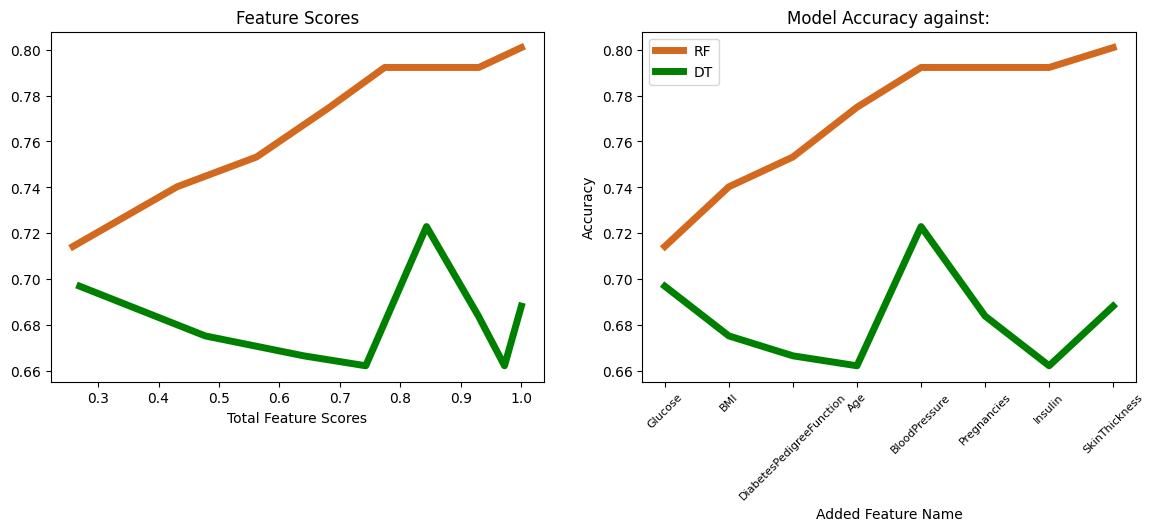

In [50]:
fig_DTRF = plt.figure(figsize=(14,10))
ax_DTRF1 = fig_DTRF.add_subplot(221)
ax_DTRF1.plot(x_plotRF,y_plotRF ,linewidth = 5.0 ,color='chocolate', label='RF')
ax_DTRF1.plot(x_plotDT,y_plotDT ,linewidth = 5.0 ,color='green', label='DT')
ax_DTRF1.set_title('Feature Scores', fontdict=None, loc='center', )
ax_DTRF1.set_xlabel('Total Feature Scores')
ax_DTRF2 = fig_DTRF.add_subplot(222)
ax_DTRF2.plot(x_name, y_plotRF, linewidth = 5.0, color='chocolate', label='RF')
ax_DTRF2.plot(x_name, y_plotDT ,linewidth = 5.0, color='green', label='DT')
ax_DTRF2.set_title('Feature Names Sorted by Importance Scores', fontdict=None, loc='center', )
ax_DTRF2.set_xlabel('Added Feature Name')
plt.title('Model Accuracy against:')
plt.ylabel('Accuracy')
plt.xticks(fontsize=8, rotation=45)
plt.legend()
# plt.savefig(dpi=600,fname='Feature_vs_Accuracy_all.png',bbox_inches='tight')
plt.show()

In [75]:
yp_RF = RF1.predict(X_test)
yp_DT = DT1.predict(X_test)
yp_DT

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [76]:
yp_RF

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [82]:
print(f'Random forest confusion matrix is \n {confusion_matrix(y_true= y_test, y_pred=yp_RF)}')
print(f'Random forest ummary evaluation is \n {classification_report(y_true = y_test, y_pred=yp_RF)}')

Random forest confusion matrix is 
 [[94  6]
 [21 33]]
Random forest ummary evaluation is 
               precision    recall  f1-score   support

           0       0.82      0.94      0.87       100
           1       0.85      0.61      0.71        54

    accuracy                           0.82       154
   macro avg       0.83      0.78      0.79       154
weighted avg       0.83      0.82      0.82       154



In [83]:
print(f'Decision tree confusion matrix is \n {confusion_matrix(y_true= y_test, y_pred=yp_DT)}')
print(f'Decision tree ummary evaluation is \n {classification_report(y_true = y_test, y_pred=yp_DT)}')

Decision tree confusion matrix is 
 [[73 27]
 [16 38]]
Decision tree ummary evaluation is 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       100
           1       0.58      0.70      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



In [57]:
import tensorflow as tf
from keras import Sequential
from keras import optimizers, models, Input
from keras.layers import Dense

In [105]:
sgd = optimizers.SGD(learning_rate=0.01)
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='softmax')) 
model.add(Dense(1)) 
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
 dense_45 (Dense)            (None, 1)                 2         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [106]:
%%time
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=5, validation_split=0.15, epochs=200)

Epoch 1/200
105/105 [==============================] - 2s 9ms/step - loss: 0.3662 - accuracy: 0.6583 - val_loss: 0.2096 - val_accuracy: 0.7097
Epoch 2/200
105/105 [==============================] - 1s 6ms/step - loss: 0.2131 - accuracy: 0.6891 - val_loss: 0.2017 - val_accuracy: 0.6989
Epoch 3/200
105/105 [==============================] - 1s 6ms/step - loss: 0.2097 - accuracy: 0.6987 - val_loss: 0.1981 - val_accuracy: 0.7312
Epoch 4/200
105/105 [==============================] - 1s 6ms/step - loss: 0.2078 - accuracy: 0.6910 - val_loss: 0.1958 - val_accuracy: 0.7312
Epoch 5/200
105/105 [==============================] - 1s 6ms/step - loss: 0.2058 - accuracy: 0.6987 - val_loss: 0.1937 - val_accuracy: 0.7312
Epoch 6/200
105/105 [==============================] - 1s 6ms/step - loss: 0.2036 - accuracy: 0.7063 - val_loss: 0.1917 - val_accuracy: 0.7312
Epoch 7/200
105/105 [==============================] - 1s 6ms/step - loss: 0.2025 - accuracy: 0.7083 - val_loss: 0.1896 - val_accuracy: 0.7312

In [175]:
model.save('best_mlp')

INFO:tensorflow:Assets written to: best_mlp/assets


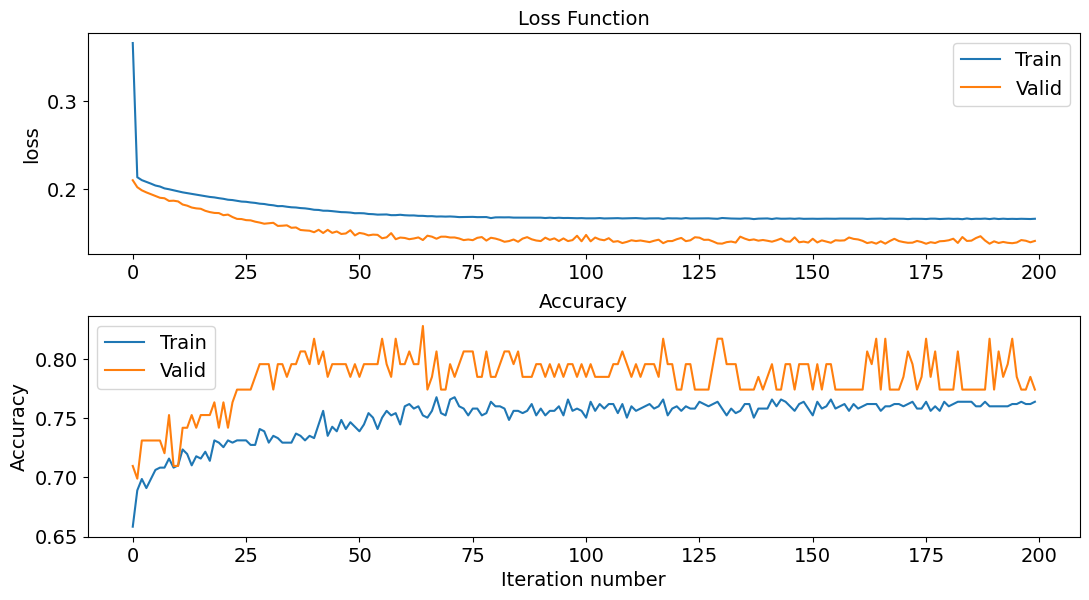

In [123]:
figMLP, axesMLP = plt.subplots(2, 1, figsize=(11, 6.5))
axesMLP[0].plot(history.epoch,history.history['loss'], label='Train')
axesMLP[0].plot(history.epoch,history.history['val_loss'], label='Valid')
axesMLP[0].set_ylabel('loss', fontsize=14)
axesMLP[0].set_title('Loss Function', fontsize=14)
axesMLP[0].xaxis.set_tick_params(labelsize=14)
axesMLP[0].yaxis.set_tick_params(labelsize=14)
axesMLP[0].legend(fontsize=14)
axesMLP[1].plot(history.epoch,history.history['accuracy'], label='Train')
axesMLP[1].plot(history.epoch,history.history['val_accuracy'], label='Valid')
#axesMLP[1].scatter(x=129, y=0.8097,'r*', label='0.8097')
axesMLP[1].set_ylabel('Accuracy', fontsize=14)
axesMLP[1].set_xlabel('Iteration number', fontsize=14)
axesMLP[1].set_title('Accuracy', fontsize=14)
axesMLP[1].xaxis.set_tick_params(labelsize=14)
axesMLP[1].yaxis.set_tick_params(labelsize=14)
axesMLP[1].legend(fontsize=14)
# figMLP.suptitle('MLP with SGD')
figMLP.tight_layout()
figMLP.subplots_adjust(top=0.88)
figMLP.show()

In [147]:
yp_mlp = model.predict(X_test).ravel()
yp_mlp
yp_mlp_class = (yp_mlp > 0.5).astype(int)
# # yp_mlp_class = [i for i in yp_mlp.astype("int32") if i > 0.5] (yp_mlp > 0.5).astype("int32")
yp_mlp_class

5/5 [==============================] - 0s 4ms/step


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

**** Confusion Matrix ****
[[95  5]
 [21 33]]
**** Classification Report ****
              precision    recall  f1-score   support

 No diabetes       0.82      0.95      0.88       100
    Diabetes       0.87      0.61      0.72        54

    accuracy                           0.83       154
   macro avg       0.84      0.78      0.80       154
weighted avg       0.84      0.83      0.82       154



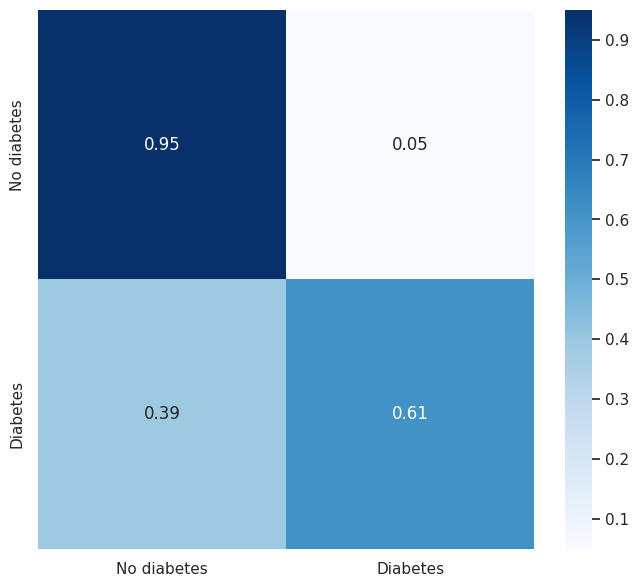

In [150]:
def plot_confusion_matrix(y_test,y_scores, classNames):
    # y_test=np.argmax(y_test, axis=1)
    # y_scores=np.argmax(y_scores, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])

    plt.figure(figsize=(8,7))
    sns.set(font_scale=1) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")

classNames = ['No diabetes', 'Diabetes'] 
plot_confusion_matrix(y_test.to_numpy(),yp_mlp_class, classNames) 

In [144]:
y_test.to_numpy()

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

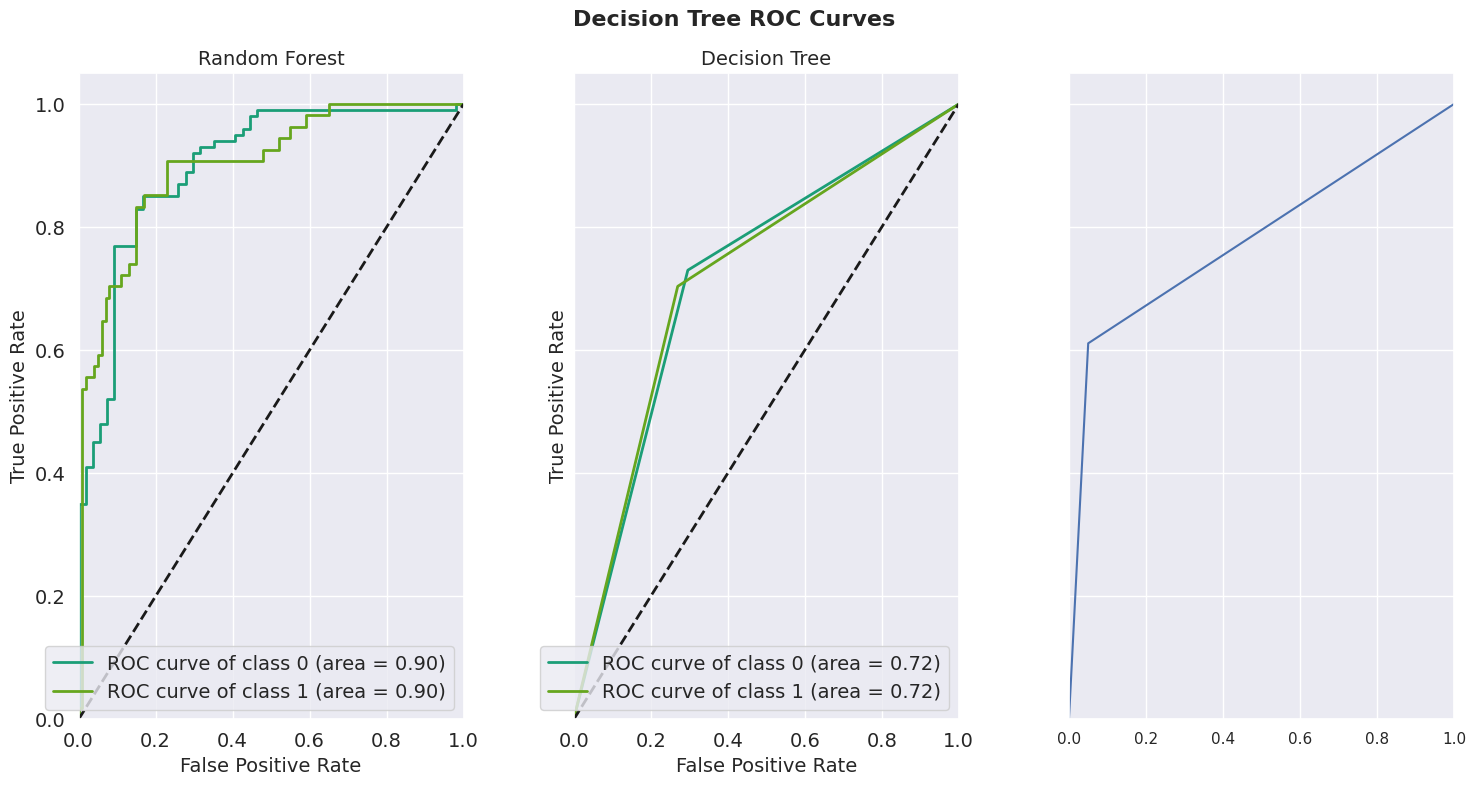

In [174]:
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds_keras = roc_curve(y_test, yp_mlp_class)
auc_mlp = auc(fpr, tpr)
#%%
fig_auc,ax_auc = plt.subplots(1,3, sharex=True, sharey=True, figsize=(15,8), facecolor='white')
fig_auc.suptitle('Decision Tree ROC Curves', fontsize=16, fontweight='bold')
# ax_auc[0].set_title('Small Set', fontsize=14)
# ax_auc[1].set_title('Large Set', fontsize=14)
skplt.metrics.plot_roc(y_test, RF1.predict_proba(X_test), title='Random Forest', ax=ax_auc[0], cmap="Dark2", plot_micro=False, plot_macro=False, title_fontsize=14, text_fontsize=14)
skplt.metrics.plot_roc(y_test, DT1.predict_proba(X_test), title='Decision Tree', ax=ax_auc[1], cmap="Dark2", plot_micro=False, plot_macro=False, title_fontsize=14, text_fontsize=14)
ax_auc[2].plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_mlp))
# skplt.metrics.plot_roc(y_test, model.predict(X_test), title='MLP', ax=ax_auc[2], cmap="Dark2", plot_micro=False, plot_macro=False, title_fontsize=14, text_fontsize=14)
fig_auc.tight_layout()
# fig_auc.savefig('ROC_DT_Curves.png', bbox_inches='tight', dpi=300)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=592150bd-22cf-4c14-9fa5-3557317a3e2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>